# Hotel Database Design

## Objective

Design and implement a relational database for a hotel, providing a clear, organized, and professional representation of the hotel’s data.

## Instructions

1. **Table Creation**: Incorporate the following tables into the database:

    - `guests`: Each guest is assigned a unique integer identifier, starting from 1. Include an additional five attributes that can effectively characterize a hotel guest.
    
    - `buildings`: The hotel encompasses a large territory with multiple buildings. Each building is assigned a unique name (e.g., 1, 2, 3A, 3B, …), location coordinates (latitude and longitude), the total number of rooms, the number of floors, and a brief description.
    
    - `rooms`: Each room is characterized by its area, number of beds, presence of a bath, maximum occupancy, floor, and associated building.
    
    - `reservations`: This table records the reservations made by guests. Each reservation is defined by the reservation period, duration of stay in days, guest, and room. New reservations are automatically assigned a unique numeric identifier. The board type (RO, BB, HB, FB, AI) is also recorded in the reservation.

2. **Foreign Keys**: Establish the necessary foreign keys to maintain data integrity.

3. **Check Constraints**: Implement three check constraints to ensure data validity.

4. **Data Entry**: Populate the tables as follows:

    - `buildings`: Insert 2 records.

    - `rooms`: Add 3 records in the first building and 2 in the second building.
    
    - `guests`: Register 2 guests with one stay and 2 guests with two stays.

5. **Database Dump**: Utilize `pg_dump` to generate a database dump file.

## Solution

### Table Creation

Let's clarify the types of relationships between the tables:

1. `guests` and `reservations`:
    - This is a one-to-many relationship, where one guest can make multiple reservations, but each reservation is linked to one specific guest.

2. `buildings` and `rooms`:
    - This is a one-to-many relationship. One building can contain many rooms, but each room belongs to only one specific building.

3. `rooms` and `reservations`:
    - This is also a one-to-many relationship. One room can have many reservations over time, but each reservation is for one specific room.

```sql
-- Creating the guests table
CREATE TABLE guests (
    guest_id SERIAL PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(50) NOT NULL,
    birth_date DATE,
    email VARCHAR(50) UNIQUE NOT NULL,
    phone_number VARCHAR(25),
    vip_status BOOLEAN DEFAULT FALSE
);

-- Creating the buildings table
CREATE TABLE buildings (
    building_id SERIAL PRIMARY KEY,
    building_name VARCHAR(10) UNIQUE NOT NULL,
    latitude NUMERIC(9, 6) NOT NULL,
    longitude NUMERIC(9, 6) NOT NULL,
    num_of_rooms INT NOT NULL CHECK (num_of_rooms > 0),
    num_of_floors INT NOT NULL CHECK (num_of_floors > 0),
    description TEXT
);

-- Creating the rooms table
CREATE TABLE rooms (
    room_id SERIAL PRIMARY KEY,
    area NUMERIC(5, 2) NOT NULL CHECK (area > 0),
    num_of_beds INT NOT NULL CHECK (num_of_beds > 0),
    has_bath BOOLEAN DEFAULT FALSE,
    max_occupancy INT NOT NULL CHECK (max_occupancy > 0),
    floor INT NOT NULL CHECK (floor > 0),
    building_id INT NOT NULL REFERENCES buildings(building_id)
);

-- Creating the reservations table
CREATE TABLE reservations (
    reservation_id SERIAL PRIMARY KEY,
    start_date TIMESTAMP NOT NULL,
    end_date TIMESTAMP NOT NULL CHECK (end_date > start_date),
    duration_days INT NOT NULL CHECK (duration_days > 0),
    board_type CHAR(2) NOT NULL CHECK (board_type IN ('RO', 'BB', 'HB', 'FB', 'AI')),
    guest_id INT NOT NULL REFERENCES guests(guest_id),
    room_id INT NOT NULL REFERENCES rooms(room_id)
);
```

### ER Diagram

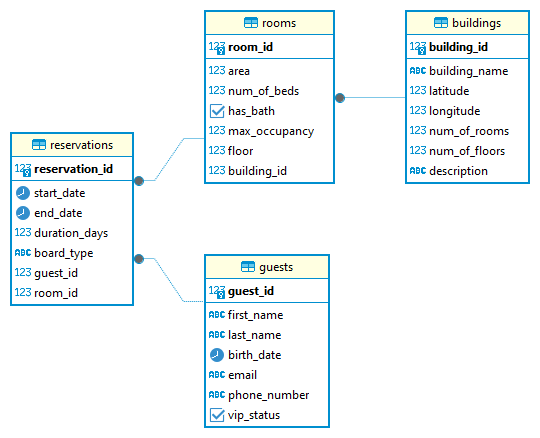

### Data Insertion

```sql
-- Inserting data into the guests table
INSERT INTO guests (first_name, last_name, birth_date, email, phone_number, vip_status)
VALUES 
    ('John', 'Doe', '1990-01-01', 'john.doe@example.com', '1234567890', TRUE),
    ('Jane', 'Doe', '1995-02-02', 'jane.doe@example.com', '0987654321', TRUE),
    ('Angela', 'Smith', '1985-03-03', 'angela.smith@example.com', '1112223333', FALSE),
    ('Walter', 'Black', '1980-04-04', 'walter.black@example.com', '4445556666', FALSE);

-- Inserting data into the buildings table
INSERT INTO buildings (building_name, latitude, longitude, num_of_rooms, num_of_floors, description)
VALUES 
    ('1A', 36.114510, -115.194669, 75, 8, 'Palms Casino Resort, Las Vegas'),
    ('2B', 34.081823, -118.413357, 50, 6, 'The Beverly Hills Hotel, California');

-- Inserting data into the rooms table
INSERT INTO rooms (area, num_of_beds, has_bath, max_occupancy, floor, building_id)
VALUES 
    (25.50, 2, TRUE, 2, 1, 1),
    (30.00, 3, TRUE, 3, 2, 1),
    (20.00, 1, FALSE, 1, 3, 1),
    (35.00, 4, TRUE, 4, 1, 2),
    (22.5, 1, FALSE, 1, 1, 2);

-- Inserting data into the reservations table
INSERT INTO reservations (start_date, end_date, duration_days, board_type, guest_id, room_id)
VALUES 
    ('2024-01-01 12:00:00.000', '2024-01-08 12:00:00.000', 7, 'HB', 1, 1),
    ('2024-01-01 12:00:00.000', '2024-01-05 12:00:00.000', 4, 'BB', 2, 2),
    ('2024-02-05 10:00:00.000', '2024-02-09 10:00:00.000', 4, 'AI', 3, 3),
    ('2024-01-05 09:00:00.000', '2024-01-07 09:00:00.000', 2, 'HB', 3, 4),
    ('2024-01-05 12:00:00.000', '2024-01-19 12:00:00.000', 14, 'FB', 4, 5),
    ('2024-02-01 11:30:00.000', '2024-02-07 11:30:00.000', 6, 'HB', 4, 1);
```